In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=2,suppress=True, edgeitems=8, linewidth=120)

In [2]:
pd.set_option('display.max_colwidth', 120)

data = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/segmentation_data.txt", header=None)
features = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/segmentation_names.txt", header=None)
data.columns = features.values.ravel()
data.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [3]:
classes = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/segmentation_classes.txt", 
                      usecols=[1], sep='\t', header=None)

In [4]:
classes

,1
0,0
1,0
2,0
3,0
4,0
...,...
2095,3
2096,3
2097,3
2098,3


In [5]:
class_names = np.array(['GRASS', 'PATH', 'WINDOW', 'CEMENT', 'FOLIAGE', 'SKY', 'BRICKFACE'])

class_names

array(['GRASS', 'PATH', 'WINDOW', 'CEMENT', 'FOLIAGE', 'SKY', 'BRICKFACE'], dtype='<U9')

In [6]:
### Need to convert calsses to an array of class labels
y = classes.values.ravel()
print(y)

[0 0 0 0 0 0 0 0 ... 2 3 3 3 3 3 3 3]


In [7]:
X = np.array(data)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [9]:
scaler = StandardScaler()

In [10]:
from sklearn.linear_model import Perceptron
per = Perceptron(max_iter=1000, penalty='l2', alpha=0.0001, eta0=0.1, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=33)

In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, verbose=False, alpha=1e-4, learning_rate_init=.001, random_state=1)

In [13]:
model0 = make_pipeline(scaler, per)
model1 = make_pipeline(scaler, rf)
model2 = make_pipeline(scaler, mlp)

In [14]:
per_xval = cross_val_score(model0, X_train, y_train, cv=10)
print(per_xval)
print('Overall Average accuracy: %f +/- %f'%(per_xval.mean(),per_xval.std()))

[0.88 0.89 0.86 0.83 0.89 0.93 0.86 0.9  0.87 0.8 ]
Overall Average accuracy: 0.871934 +/- 0.034300


In [15]:
rf_xval = cross_val_score(model1, X_train, y_train, cv=10)
print(rf_xval)
print('Overall Average accuracy: %f +/- %f'%(rf_xval.mean(),rf_xval.std()))

[0.95 0.96 0.95 0.98 0.96 0.95 0.95 0.97 0.98 0.96]
Overall Average accuracy: 0.961961 +/- 0.012367


In [16]:
mlp_xval = cross_val_score(model2, X_train, y_train, cv=10)
print(mlp_xval)
print('Overall Average accuracy: %f +/- %f'%(mlp_xval.mean(),mlp_xval.std()))

[0.97 0.98 0.97 0.98 0.98 0.97 0.96 0.98 0.97 0.98]
Overall Average accuracy: 0.973219 +/- 0.004768


In [17]:
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100, 50),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_iter=500,
                               momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [18]:
print("Score on Training: " + str(model2.score(X_train, y_train)))

Score on Training: 0.9976190476190476


In [19]:
print("Score on Test: " + str(model2.score(X_test, y_test)))

Score on Test: 0.9523809523809523


In [20]:
y_fit = model2.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit, target_names=class_names))

              precision    recall  f1-score   support

       GRASS       1.00      0.98      0.99        59
        PATH       0.98      1.00      0.99        60
      WINDOW       0.86      0.91      0.89        68
      CEMENT       0.91      0.92      0.92        53
     FOLIAGE       0.93      0.85      0.89        62
         SKY       1.00      1.00      1.00        69
   BRICKFACE       1.00      1.00      1.00        49

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420



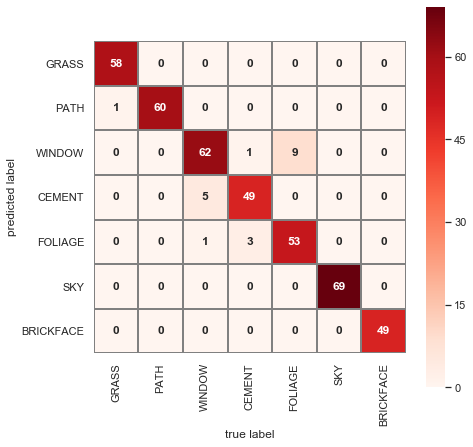

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_fit)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(mat.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels=class_names,
            yticklabels=class_names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label');